In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt


Text(0, 0.5, 'Capacitor')

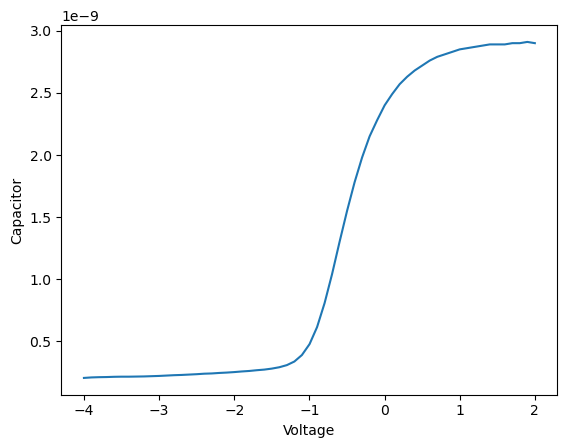

In [2]:
file = "CV Data.csv"

#C vs V

v = [] #voltage
c = [] #capacitance


cnt =0

with open(file,"r") as f:
    data = csv.reader(f)
    for i in data:
        cnt += 1
        if (cnt >= 4):
            v.append(float(i[0]))
            c.append(float(i[1]))


plt.plot(v,c)
plt.xlabel("Voltage")
plt.ylabel("Capacitor")

In [3]:
from bisect import bisect_left

# Ref : https://docs.python.org/3/library/bisect.html

def take_closest(myList, myNumber):
    """
    Assumes myList is sorted. Returns closest value to myNumber.

    If two numbers are equally close, return the smallest number.
    """
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return myList[0]
    if pos == len(myList):
        return myList[-1]
    before = myList[pos - 1]
    after = myList[pos]
    if after - myNumber < myNumber - before:
        return after
    else:
        return before

Enter the starting val of voltage :  -2
Enter the ending val of voltage :  1


17 47


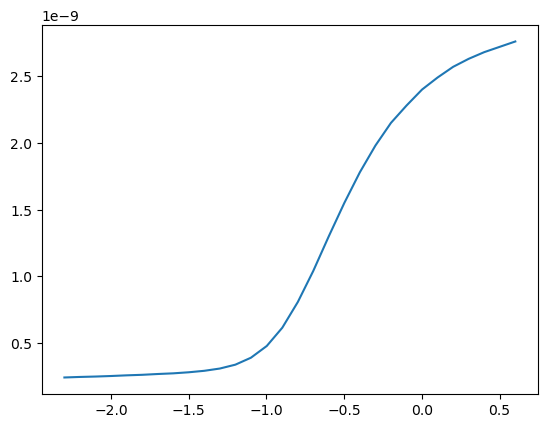

Press 1 to try again else 0 :  0


In [4]:
start_idx = 0
end_idx = 0
while True:
    start_val = float(input("Enter the starting val of voltage : "))
    end_val = float(input("Enter the ending val of voltage : "))
    start_idx = v.index(take_closest(v,start_val)) - 3
    end_idx = v.index(take_closest(v,end_val)) - 3
    # start_idx =  v.index(min(v, key = lambda x1 : abs(start_val - x1))) - 3
    # end_idx =  v.index(max(v, key = lambda x1 : abs(start_val - x1))) - 3
    print(start_idx,end_idx)
    plt.plot(v[start_idx:end_idx],c[start_idx:end_idx])
    plt.show()
    again = int(input("Press 1 to try again else 0 : "))
    if again == 1:
        pass
    else:
        break

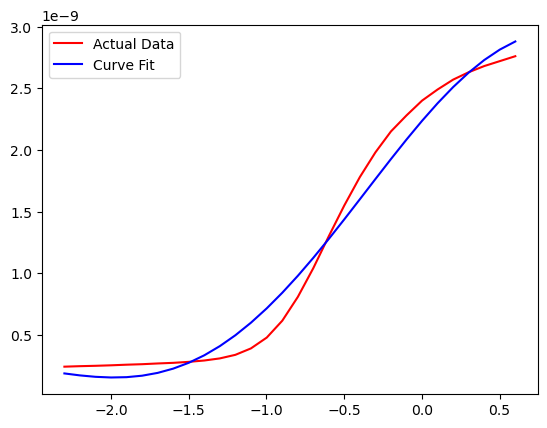

In [5]:
curve = np.polyfit(v,c,6)
poly = np.poly1d(curve)
temp = [] 
for i in v[start_idx:end_idx]:
    temp.append(poly(i))
plt.plot(v[start_idx:end_idx],c[start_idx:end_idx],color='r')
plt.plot(v[start_idx:end_idx],temp[:],color='b')
plt.legend(["Actual Data","Curve Fit"])

In [6]:
import sympy as sp
xs = sp.symbols('x')
f_lst = 0
# print(curve)
for i in range(len(curve)):
    f_lst += curve[i]*pow(xs,(len(curve)-1-i))
# print(f_lst)
# print(f)
df = sp.diff(f_lst, xs,int(input(f"Enter nth derivative(Max is {len(curve)-1}) : ")))
slope = df.subs(xs, float(input("Enter slope at point x : "))).evalf()
print(slope)

# f = -4.362e-10*x**7 + 4.02e-09*x**6 - 1.244e-08*x**5 + 1.282e-08*x**4 + 5.667e-09*x**3 - 1.64e-08*x**2 - 2.939e-09*x + 6.226e-08
# df = diff(f, x,int(input("Enter nth derivative : ")))
# slope = df.subs(x, int(input("Enter slope at point x : ")))
# print(slope)


Enter nth derivative(Max is 6) :  1
Enter slope at point x :  2


2.13199628371051e-9
